In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from sklearn import metrics

In [3]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.shape

(5000, 14)

In [5]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### Read the column description and ensure you understand each attribute well

As all the columns are int64 and float64 and there are no objects, there are no missing values and all the columns can be contributed for prediction.

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


    Up on observing ID and ZIP Code columns are not required for data analysis, so ID and ZIP Code columns can be dropped.

In [8]:
df.drop(["ID"],axis=1,inplace=True)

In [13]:
df.drop(["ZIP Code"],axis=1,inplace=True)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


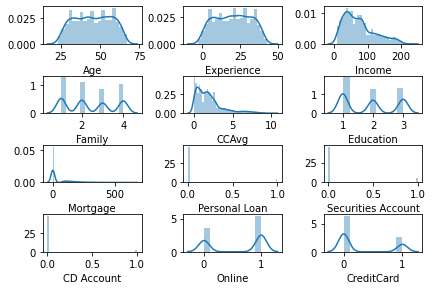

In [165]:
fig1, axs1 = plt.subplots(4,3)
fig1.tight_layout()

for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axs1[i//3,i%3])

plt.show()

#### Study the data distribution in each attribute, share your findings
In the above distribution plot of each attribute:<br> 

- Age and Experience are following normal distribution.<br>
- Income, CCAvg are right skewed.<br>
- Remaining values are discrete distribution.<br>

In [29]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


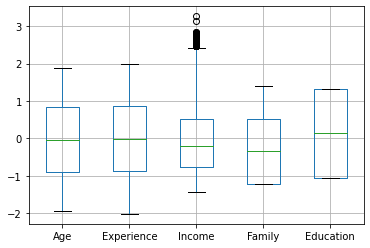

In [107]:
ageExperdf = pd.DataFrame(data = df_zscore,columns=["Age","Experience","Income","Family","Education"])
ageExperdf.boxplot()

#### Study the data distribution in each attribute, share your findings
According to the above box plot 
- Age and Experience fall under normal distribution and there are no outliners in these attributes. <br>
- Income is right skewed and having outliers<br>
- Education and Family falls discrete distribution.<br>

E:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


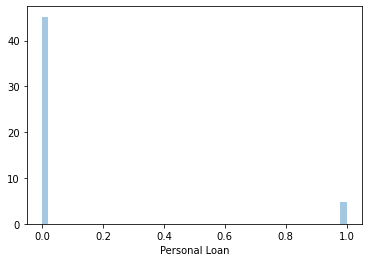

In [60]:
sns.distplot(df.xs('Personal Loan',axis=1))

#### Get the target column distribution. Your comments
As the prediction to be done on customers opting for personal loan or not, above is the distribution on target column "Personal Loan"<br>

- Above distribution is discrete 

#### Split the data into training and test set in the ratio of 70:30 respectively

In [264]:
sup_col = df.drop('Personal Loan',axis = 1)
trg_col = df['Personal Loan']

In [242]:
Zsup_col = sup_col.apply(zscore)

In [209]:
Y = trg_col.values.reshape(len(trg_col),)

In [243]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Zsup_col,Y,test_size=0.3,random_state=1)

### Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

#### Logistic Model

In [271]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', multi_class= 'auto')
lr.fit(x_train, y_train)
print("Logistic Model Acuurecy : {0:.4f}".format(lr.score(x_train, y_train)))

Logistic Model Acuurecy : 0.9531


In [246]:
y_prid = lr.predict(x_test)

Confusion Metrics for logistic model

In [247]:
print(metrics.confusion_matrix(y_test,y_prid))

[[1335   16]
 [  62   87]]


Classification Report for logistic model

In [248]:
print(metrics.classification_report(y_test,y_prid))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



#### According to the above classification report below are the observations

- Precision for not giving loan is higher than the precision for giving loan
- 99% are caught for not giving, but very low recall for giving loan. 

#### KNN Model

In [270]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)
print("KNN Model Acuurecy : {0:.4f}".format(NNH.score(x_train, y_train)))

KNN Model Acuurecy : 1.0000


In [267]:
knn_prid = NNH.predict(x_test)

In [269]:
print(metrics.confusion_matrix(y_test,knn_prid))

[[1344    7]
 [  62   87]]


In [275]:
print(metrics.classification_report(y_test,knn_prid))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.93      0.58      0.72       149

    accuracy                           0.95      1500
   macro avg       0.94      0.79      0.85      1500
weighted avg       0.95      0.95      0.95      1500



- Precision for not giving loans is high than for giving loans.
- 99% are caught for not giving, but very low recall for giving loan.

#### Naive Bayes

In [272]:
from sklearn.naive_bayes import GaussianNB
loan_model = GaussianNB()
loan_model.fit(x_train, y_train.ravel())
print("Naive Bayes Model Acuurecy : {0:.4f}".format(loan_model.score(x_train, y_train)))

Naive Bayes Model Acuurecy : 0.8900


In [273]:
NB_prid = loan_model.predict(x_test)

In [274]:
print(metrics.confusion_matrix(y_test,NB_prid))

[[1228  123]
 [  65   84]]


In [276]:
print(metrics.classification_report(y_test,NB_prid))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



#### Give your reasoning on which is the best model in this case and why it performs better?

In [ ]:
KNN model performs better on this dataset, following are the resons:
    - KNN model is having high model accurcy of 1
    - Precision for both the classes are high compared to other models.